<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 6. Earth Orbit
## Simple sinus
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we play with simple **harmonic** functions, creating an artifical climate time series,
and we look at the spectrum of our time series, using `python`.

We first initialize the `python` libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

## Simple sinus-functions

Definition of *Fourier series* with sine and cosine functions:
$$
 f(t) = \sum\limits_{m=0}^{\infty} 
        \left(  
        a_m \cos \frac{\displaystyle 2\pi m t}{\displaystyle T}
       +b_m \sin \frac{\displaystyle 2\pi m t}{\displaystyle T}
        \right)
$$
$m$ is the iteration counter, $t$ time, $T$ the period, 
and $a_m$ and $b_m$ are the amplitudes.

In the example below, we use $m=1$ and only sine functions:
$$
\begin{array}{rcl}
f(t) & = & a_1\times \sin\left( \frac{\displaystyle 2\pi t}{\displaystyle T_{100,000}} \right) \\
     & + & a_2\times \sin\left( \frac{\displaystyle 2\pi t}{\displaystyle T_{41,000}} \right) \\
     & + & a_3\times \sin\left( \frac{\displaystyle 2\pi t}{\displaystyle T_{23,000}} \right) \\
     & + & a_4\times \sin\left( \frac{\displaystyle 2\pi t}{\displaystyle T_{19,000}} \right)
\end{array}
$$

We first define four frequencies, four amplitudes, and the time range.

Then, empty arrays for time and sinus functions are initialised, filled with zeros, using the
`zeros` function from `numpy`.

Then, a loop filling the sinus functions with the initial values defined above is run.



In [2]:
# define frequencies
f1 = 100000.; a1 = 1.0 # eccentricity
f2 =  41000.; a2 = 1.0 # obliquity
f3 =  23000.; a3 = 1.0 # precession
f4 =  19000.; a4 = 1.0 # precession
# timing
tmin  = -800000
tmax  = 0
tstep = 500
nmax  = int((tmax-tmin) / tstep)+1

#-----------------------------------------------------------------------
# create time series
#-----------------------------------------------------------------------
time = np.zeros(nmax);sin0 = np.zeros(nmax)
sin1 = np.zeros(nmax);sin2 = np.zeros(nmax)
sin3 = np.zeros(nmax);sin4 = np.zeros(nmax)
i=0
for t in np.arange(tmin,tmax+tstep,tstep):
    time[i] = t
    sin1[i] = np.sin(2.*np.pi*t/f1)
    sin2[i] = np.sin(2.*np.pi*t/f2)
    sin3[i] = np.sin(2.*np.pi*t/f3)
    sin4[i] = np.sin(2.*np.pi*t/f4)
    i = i + 1

Finally, we define a function, using the `def` procedure, which we will use to plot the
sinus functions with the `matplotlib` package.

When we run this cell, it seems that nothing is happening... Wrong: We prepared everything for plotting.

In [3]:
#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def plot_sinus(f1,f2,f3,f4,a1,a2,a3,a4):
    plt.figure(figsize=(12.0, 6.0))
    plt.xlabel('Time B.P. [years]',size=12)
    plt.ylabel('Amplitude',size=12)
    plt.title('Synthetic sinus functions',size=12)
    sin = sin0
    if (f1):
        sin = sin + a1*sin1
        plt.plot(time/1000,a1*sin1,color='grey',linestyle='-',linewidth=1,label='100,000')
    if (f2):
        sin = sin + a2*sin2
        plt.plot(time/1000,a2*sin2,color='grey',linestyle='-',linewidth=1,label='41,000')
    if (f3):
        sin = sin + a3*sin3
        plt.plot(time/1000,a3*sin3,color='grey',linestyle='-',linewidth=1,label='23,000')
    if (f4):
        sin = sin + a4*sin4
        plt.plot(time/1000,a4*sin4,color='grey',linestyle='-',linewidth=1,label='19,000')
    plt.plot(time/1000,sin,color='red',linestyle='-',linewidth=2,label='Sum')

    plt.xlim([tmin/1000,tmax/1000])
    plt.ylim([-4,4])
    plt.legend(loc='upper right')
    plt.show()

Now we just need to call the defined function `plot_sinus` with the initial arguments, and our figure
appears:

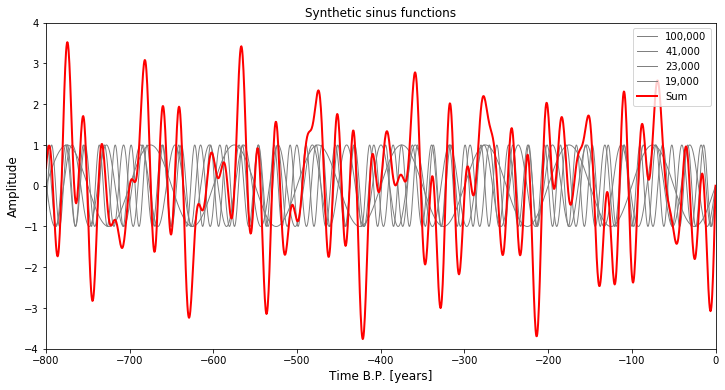

In [4]:
plot_sinus(f1,f2,f3,f4,a1,a2,a3,a4)

Finally, we use our plotting function in the interactive `ipywidgets` module to create buttons and a slider for
the relevant parameter values. Play with it and see how the time series changes!

In [5]:
# call interactive module
w = dict(
f1=widgets.Checkbox(value=False,description='100,000 years',continuous_update=False,disabled=False),
a1=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f2=widgets.Checkbox(value=False,description='41,000 years',continuous_update=False,disabled=False),
a2=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f3=widgets.Checkbox(value=False,description='23,000 years',continuous_update=False,disabled=False),
a3=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f4=widgets.Checkbox(value=False,description='19,000 years',continuous_update=False,disabled=False),
a4=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0))
output = widgets.interactive_output(plot_sinus, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

## Spectra

To analyse the spectral content of the time series, we use a real 1D Fourier transform from the
`python` package.

In [6]:
# define frequencies
f1 = 100000.; a1 = 1.0 # eccentricity
f2 =  41000.; a2 = 1.0 # obliquity
f3 =  23000.; a3 = 1.0 # precession
f4 =  19000.; a4 = 1.0 # precession
# timing
tmin  = -800000
tmax  = 0
tstep = 500
rate  = 1 / tstep
nmax  = int((tmax-tmin) / tstep)+1
#-----------------------------------------------------------------------
# create time series
#-----------------------------------------------------------------------
time = np.zeros(nmax);sin0 = np.zeros(nmax)
sin1 = np.zeros(nmax);sin2 = np.zeros(nmax)
sin3 = np.zeros(nmax);sin4 = np.zeros(nmax)
i=0
for t in np.arange(tmin,tmax+tstep,tstep):
    time[i] = t
    sin1[i] = np.sin(2.*np.pi*t/f1)
    sin2[i] = np.sin(2.*np.pi*t/f2)
    sin3[i] = np.sin(2.*np.pi*t/f3)
    sin4[i] = np.sin(2.*np.pi*t/f4)
    i = i + 1

#-----------------------------------------------------------------------
# define function to plot interactively
#-----------------------------------------------------------------------
def plot_spectra(f1,f2,f3,f4,a1,a2,a3,a4):
    tstep = 500
    rate  = 1 / tstep
    plt.figure(figsize=(12.0, 8.0))
    plot1=plt.subplot2grid((2,2), (0,0), colspan=2,rowspan=1)
    plot2=plt.subplot2grid((2,2), (1,0), colspan=2,rowspan=1)
    # plot time series
    plot1.set_xlabel('Time B.P. [y]')
    plot1.set_ylabel('Amplitude')
    sin = sin0
    if (f1):
        sin = sin + a1*sin1
        plot1.plot(time/1000,a1*sin1,color='grey',linestyle='-',linewidth=1,label='100,000')
    if (f2):
        sin = sin + a2*sin2
        plot1.plot(time/1000,a2*sin2,color='grey',linestyle='-',linewidth=1,label='41,000')
    if (f3):
        sin = sin + a3*sin3
        plot1.plot(time/1000,a3*sin3,color='grey',linestyle='-',linewidth=1,label='23,000')
    if (f4):
        sin = sin + a4*sin4
        plot1.plot(time/1000,a4*sin4,color='grey',linestyle='-',linewidth=1,label='19,000')
    plot1.plot(time/1000,sin,color='red',linestyle='-',linewidth=2,label='Sum')
    plot1.set_xlim([tmin/1000,tmax/1000])
    plot1.set_ylim([-4,4])
    plot1.legend(loc='upper right')
    # calculate and plot spectrum 
    p1 = np.abs(np.fft.rfft(sin))
    f = np.linspace(rate/2/len(p1), rate/2, len(p1))
    plot2.set_xlabel('Period [y]',size=12)
    plot2.set_ylabel('Power spectrum',size=12)
    plot2.set_xlim([10000,200000])
    #plt.xticks([0,4,7,10,15,20,25,30])
    plot2.plot(1./f,p1,label='Spectrum')
    plot2.legend()
    plt.show()
    
# call interactive module
w = dict(
f1=widgets.Checkbox(value=False,description='100,000 years',continuous_update=False,disabled=False),
a1=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f2=widgets.Checkbox(value=False,description='41,000 years',continuous_update=False,disabled=False),
a2=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f3=widgets.Checkbox(value=False,description='23,000 years',continuous_update=False,disabled=False),
a3=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f4=widgets.Checkbox(value=False,description='19,000 years',continuous_update=False,disabled=False),
a4=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0))
output = widgets.interactive_output(plot_spectra, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

... done